# Run basic evaluation based on validation output

## Import packages

In [49]:
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
from os import listdir
from os.path import isfile, join

## Load data from all frames

In [50]:
file_list = [f for f in listdir("validation_output") if isfile(join("validation_output", f))]
dfs = []
for i in range(len(file_list)):
    fname = "validation_output/" + file_list[i]
    df_temp = pd.read_csv(fname)
    df_temp["src"] = file_list[i].replace(".csv", "")
    dfs.append(df_temp)
df = pd.concat(dfs)

## Plots
### Average accuracy per round / comparison

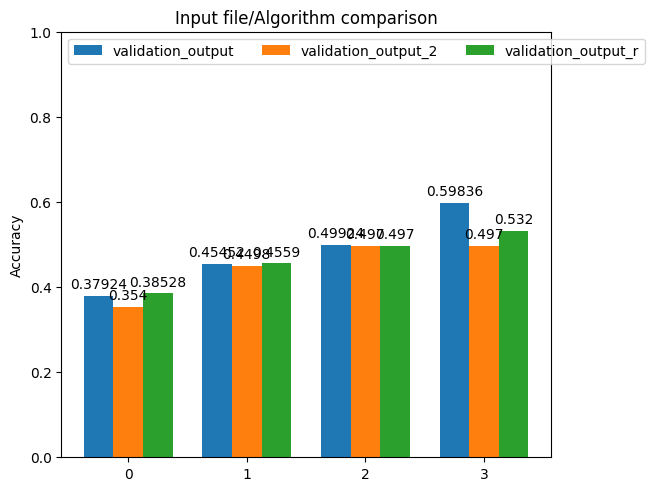

In [51]:
df_plot = df[['round', 'acc', 'src']].groupby(['src', 'round']).mean().reset_index()
sources = df_plot['round'].unique()
res_dict = {}
for i in df_plot['src'].unique():
    res_dict[i] = df_plot[df_plot['src'] == i]['acc']
x = np.arange(len(sources))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0
fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in res_dict.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy')
ax.set_title('Input file/Algorithm comparison')
ax.set_xticks(x + width, sources)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 1)

plt.show()

In [36]:
df

,round,client,loss,acc,src
0,0,stern-girder,0.057993,0.359,validation_output_2
1,0,fuchsia-polygon,0.058311,0.353,validation_output_2
2,0,clever-hatchback,0.057564,0.343,validation_output_2
3,0,generous-technology,0.058263,0.346,validation_output_2
4,0,generous-wavelength,0.057155,0.386,validation_output_2
...,...,...,...,...,...
195,3,coherent-window,0.041468,0.518,validation_output_r
196,3,kind-cayenne,0.040436,0.541,validation_output_r
197,3,inflammable-gang,0.042148,0.537,validation_output_r
198,3,wan-shop,0.042618,0.513,validation_output_r


ValueError: 'color' is not a valid value for color

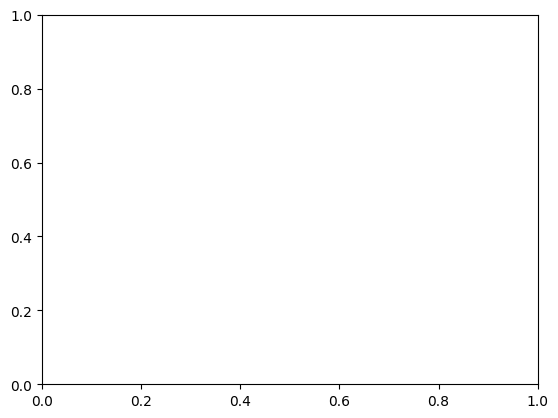

In [47]:
df_plot = df
df_plot['color'] = pd.Categorical(df_plot['src']).codes
df.plot(x='round', y='acc', c='color')

In [48]:
df_plot['color']

0      1
1      1
2      1
3      1
4      1
      ..
195    2
196    2
197    2
198    2
199    2
Name: color, Length: 320, dtype: int8